In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# EPIDEMIJE

## Nastanek modeliranja epidemij


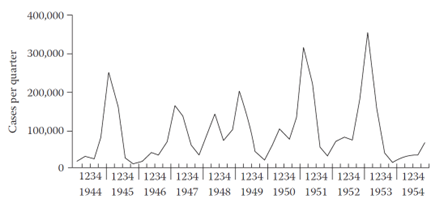

- Graf bolezni  ošpic – vidijo se vzorci -> obstajati mora 
matematičen opis vzorcev (začetki nastajanja modelov)

- Vsi nastali modeli omejeni z določenimi predpostavkami

- Skica širjenja bolezni - ocenimo lahko OSNOVNO STOPNJO RAZMNOŽEVANJA / NALEZLOSTI ($𝑹_𝟎$) virusa 
- $𝑹_𝟎$ določimo s stetjem sekundarnih bolnikov pri majhni imunosti
- Nalezlost se s časom manjša zaradi imunosti -> $R$


### Osnovna stopnja razmnoževanja ($R_0$)

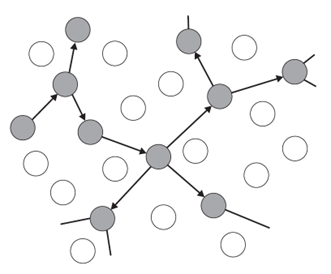

- $𝑹_𝟎<𝟏$ : vsak naslednji valj okužbe manjši kot prejšnji
- $𝑹_𝟎=𝟏$ : zmerja enako število okuženih -> ENDEMIČNA BOLEZEN
- $𝑹_𝟎>𝟏$ : nenadzorovano širjenje  bolezni -> EPIDEMIJA


- Epidemija zamira: prekuženih 50 % populacije -> $R$ pade iz 2 proti 1
- Cepljenje: obsežnost odvisna od $𝑹_𝟎$ (večji $𝑹_𝟎$, večja potreba po cepljenju)
npr. $𝑹_𝟎=𝟒$ -> cepiti treba vsaj 75 % ljudi, da ne pride do epidemije
- Delež imunih: $𝒑$ (ni nujno cepljenih, cepivo ni 100%)

Da preprečimo epidemijo potrebno cepiti:

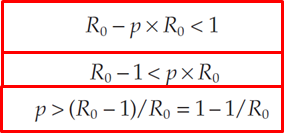

$p=1-\frac{1}{R_0}$

Primer: ošpice -> $𝑹_𝟎 = 15$ -> cepiti treba vsaj 94 % ljudi!


Predstavil bom modele [SIR](#SIR-model), [SEIR](#SEIR-model) in [SEIQR](#Model-SEIQR-(IZOLACIJA)). Na koncu pa še bom primerjal [SEIR vs SEIQR](#Primerjava-Covid_19-z-izolacijo-ali-brez) model.




# SIR model

- Najpreprostejši model 
- Opisuje zelo nalezljive otroške bolezni (ošpice)  
- Kratke inkubacijske dobe, kratka trajanja in zagotovljena odpornost po prebolenju
- Fiksna populacija - nihče novi ne pride, nihče ne umre
- Ljudje so kužni, takoj ko se okužijo in dokler ne ozdravijo
- Bolezen prinese nekdo od zunaj
- Dobro opiše gripo


$𝑺$: dovzeten delež osebkov
<br />$𝑰$: delež kužnih osebkov
<br />$𝑹$: delež imunih osebkov
<br />$𝜷$: verjetnost prenosa virusa v stiku z drugo osebo
<br />$𝜿$: število stikov v določeni časovni enoti
<br />$𝑫$: čas kako dolgo je osebek kužen

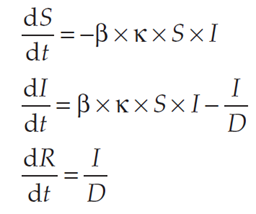

- Za okužbo se morata srečati dovzeten in kužen osebek ($𝑺\cdot𝑰$)
- Po določenem časi kužna oseba postane imuna ($\frac{𝑰}{𝑫}$)


Diferencialne enačbe:

In [2]:
def dS_dt(S, I):
    return -beta * kappa * S * I

def dI_dt(S, I):
    return beta * kappa * S * I - I / D

def dR_dt(I):
    return I / D

## Ošpice

Parametri

In [3]:
# Parametri ošpice
beta = 0.9
kappa = 20
D = 7 #dni


# Časovni interval
start_time = 0
stop_time = 40 #dni
dt = 0.01

# Inicializacija stanja 
S_o = [0.9999]
I_o = [0.0001] #tak delež začetnih okuženih
R_o = [0.0]
t_o = [start_time]

Runge-Kutta 4. reda

In [4]:
while t_o[-1] < stop_time:
    s, i, r = S_o[-1], I_o[-1], R_o[-1]
    
    # k1
    k1_s = dt * dS_dt(s, i)
    k1_i = dt * dI_dt(s, i)
    k1_r = dt * dR_dt(i)
    
    # k2
    k2_s = dt * dS_dt(s + 0.5 * k1_s, i + 0.5 * k1_i)
    k2_i = dt * dI_dt(s + 0.5 * k1_s, i + 0.5 * k1_i)
    k2_r = dt * dR_dt(i + 0.5 * k1_i)
    
    # k3
    k3_s = dt * dS_dt(s + 0.5 * k2_s, i + 0.5 * k2_i)
    k3_i = dt * dI_dt(s + 0.5 * k2_s, i + 0.5 * k2_i)
    k3_r = dt * dR_dt(i + 0.5 * k2_i)
    
    # k4
    k4_s = dt * dS_dt(s + k3_s, i + k3_i)
    k4_i = dt * dI_dt(s + k3_s, i + k3_i)
    k4_r = dt * dR_dt(i + k3_i)
    
    # Naslednje vrednosti
    next_S = s + (1/6)*(k1_s + 2*k2_s + 2*k3_s + k4_s)
    next_I = i + (1/6)*(k1_i + 2*k2_i + 2*k3_i + k4_i)
    next_R = r + (1/6)*(k1_r + 2*k2_r + 2*k3_r + k4_r)
    
    # Shranimo
    S_o.append(next_S)
    I_o.append(next_I)
    R_o.append(next_R)
    t_o.append(t_o[-1] + dt)

### Rezultat - graf 

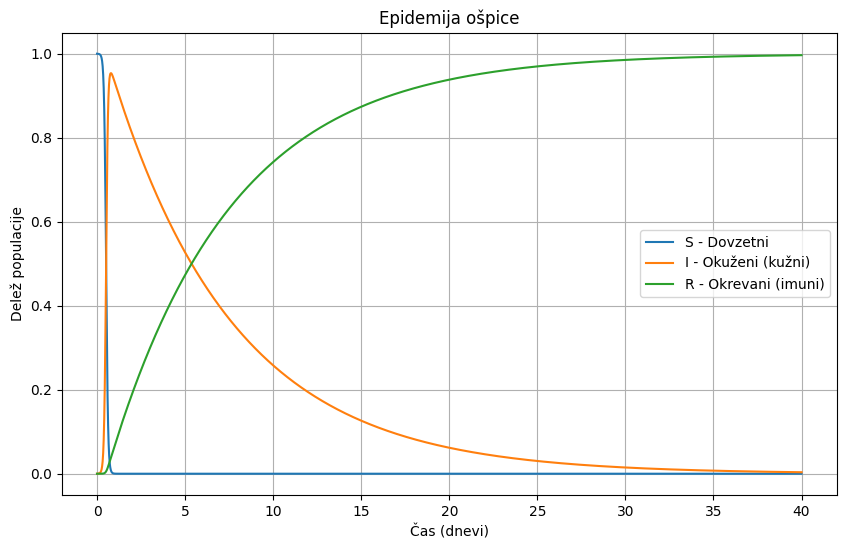

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t_o, S_o, label='S - Dovzetni')
plt.plot(t_o, I_o, label='I - Okuženi (kužni)')
plt.plot(t_o, R_o, label='R - Okrevani (imuni)')
plt.xlabel('Čas (dnevi)')
plt.ylabel('Delež populacije')
plt.title('Epidemija ošpice')
plt.legend()
plt.grid(True)
plt.show()

## Gripa

Parametri

In [6]:
# Parametri gripa
beta = 0.15
kappa = 10
D = 1 #tedni


# Časovni interval
start_time = 0
stop_time = 35 #tedni
dt = 0.0001

# Inicializacija stanja 
S_g = [0.9999]
I_g = [0.0001] #tak delež začetnih okuženih
R_g = [0.0]
t_g = [start_time]

Runge-Kutta 4. reda

In [7]:
while t_g[-1] < stop_time:
    s, i, r = S_g[-1], I_g[-1], R_g[-1]
    
    # k1
    k1_s = dt * dS_dt(s, i)
    k1_i = dt * dI_dt(s, i)
    k1_r = dt * dR_dt(i)
    
    # k2
    k2_s = dt * dS_dt(s + 0.5 * k1_s, i + 0.5 * k1_i)
    k2_i = dt * dI_dt(s + 0.5 * k1_s, i + 0.5 * k1_i)
    k2_r = dt * dR_dt(i + 0.5 * k1_i)
    
    # k3
    k3_s = dt * dS_dt(s + 0.5 * k2_s, i + 0.5 * k2_i)
    k3_i = dt * dI_dt(s + 0.5 * k2_s, i + 0.5 * k2_i)
    k3_r = dt * dR_dt(i + 0.5 * k2_i)
    
    # k4
    k4_s = dt * dS_dt(s + k3_s, i + k3_i)
    k4_i = dt * dI_dt(s + k3_s, i + k3_i)
    k4_r = dt * dR_dt(i + k3_i)
    
    # Naslednje vrednosti
    next_S = s + (1/6)*(k1_s + 2*k2_s + 2*k3_s + k4_s)
    next_I = i + (1/6)*(k1_i + 2*k2_i + 2*k3_i + k4_i)
    next_R = r + (1/6)*(k1_r + 2*k2_r + 2*k3_r + k4_r)
    
    # Shranimo
    S_g.append(next_S)
    I_g.append(next_I)
    R_g.append(next_R)
    t_g.append(t_g[-1] + dt)

### Rezultat - graf 

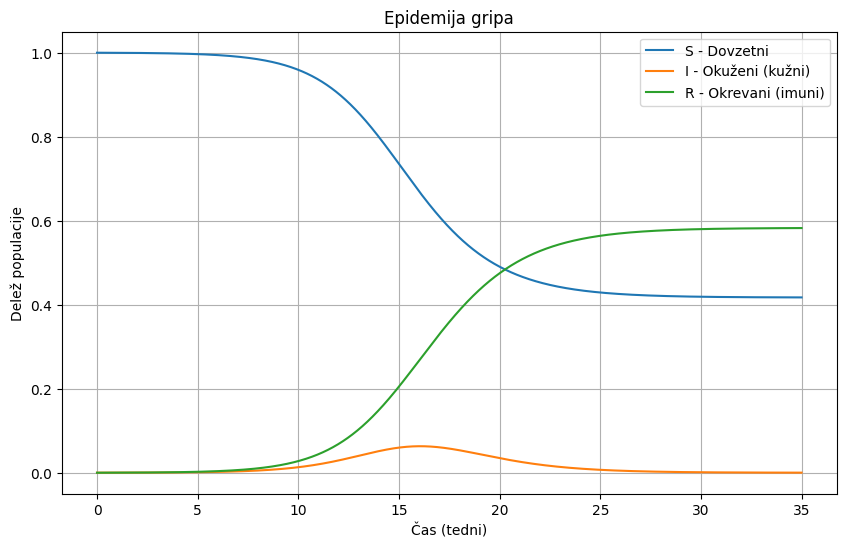

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(t_g, S_g, label='S - Dovzetni')
plt.plot(t_g, I_g, label='I - Okuženi (kužni)')
plt.plot(t_g, R_g, label='R - Okrevani (imuni)')
plt.xlabel('Čas (tedni)')
plt.ylabel('Delež populacije')
plt.title('Epidemija gripa')
plt.legend()
plt.grid(True)
plt.show()

- V modelu se zdi čudno da je kar velik del ostal ne okužen, to so sprva pripisovali temu, da ko se virus širi iz ene na drugo osebo (gre iz generacije v generacijo) izgublja moč in postane manj kužen (podobno kot se adaptira, da postane manj smrtonosen npr. Covid-19)
- Ampak v tem modelu lahko to pripišemo ČREDNI IMUNOSTI, ker so ljudje obdani z imunimi ljudmi in virus ne pride v stik z njimi


# SEIR model

- Zajema še LATENTNO OBDOBJE (preden oseba postane kužna) – INKUBACIJSKA DOBA 
- Bolj realističen za bolezni z zamikom med okužbo in kužnostjo (Covid-19, ebola, norice…) 


$𝑺$: dovzeten delež osebkov
<br />$E$: izpostavljen, a še ne kužen
<br />$𝑰$: delež kužnih osebkov
<br />$𝑹$: delež imunih osebkov
<br />$𝜷$: verjetnost prenosa virusa v stiku z drugo osebo
<br />$𝜿$: število stikov v določeni časovni enoti
<br />$𝑫$: čas kako dolgo je osebek kužen
<br />$𝑳$: povprečno trajanje inkubacijske dobe 

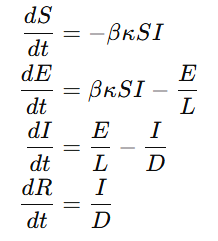

- Za okužbo se morata srečati dovzeten in kužen osebek ($𝑺\cdot𝑰$)
- Po inkubacijski dobi oseba postane kužna ($\frac{𝑬}{𝑳}$)
- Po določenem časi kužna oseba postane imuna ($\frac{𝑰}{𝑫}$)
 

Diferencialne enačbe:

In [9]:
def SEIR_dS_dt(S, I):
    return -beta * kappa * S * I

def SEIR_dE_dt(S, I, E):
    return beta * kappa * S * I - E / L

def SEIR_dI_dt(E, I):
    return E / L - I / D

def SEIR_dR_dt(I):
    return I / D

## Covid-19

Parametri

In [18]:
# Parametri Covid-19
beta = 0.045
kappa = 15
D = 7 #dni
L = 5 #dni


# Časovni interval
start_time = 0
stop_time = 250 #dni
dt = 0.01

# Inicializacija stanja 
S_c = [0.9999]
E_c = [0.0]
I_c = [0.0001] #tak delež začetnih okuženih
R_c = [0.0]
t_c = [start_time]

Runge-Kutta 4. reda

In [19]:
while t_c[-1] < stop_time:
    s, e, i, r = S_c[-1], E_c[-1], I_c[-1], R_c[-1]
    
    # k1
    k1_s = dt * SEIR_dS_dt(s, i)
    k1_e = dt * SEIR_dE_dt(s, i, e)
    k1_i = dt * SEIR_dI_dt(e, i)
    k1_r = dt * SEIR_dR_dt(i)
    
    # k2
    k2_s = dt * SEIR_dS_dt(s + 0.5 * k1_s, i + 0.5 * k1_i)
    k2_e = dt * SEIR_dE_dt(s + 0.5 * k1_s, i + 0.5 * k1_i, e + 0.5 * k1_e)
    k2_i = dt * SEIR_dI_dt(e + 0.5 * k1_e, i + 0.5 * k1_i)
    k2_r = dt * SEIR_dR_dt(i + 0.5 * k1_i)
    
    # k3
    k3_s = dt * SEIR_dS_dt(s + 0.5 * k2_s, i + 0.5 * k2_i)
    k3_e = dt * SEIR_dE_dt(s + 0.5 * k2_s, i + 0.5 * k2_i, e + 0.5 * k2_e)
    k3_i = dt * SEIR_dI_dt(e + 0.5 * k2_e, i + 0.5 * k2_i)
    k3_r = dt * SEIR_dR_dt(i + 0.5 * k2_i)
    
    # k4
    k4_s = dt * SEIR_dS_dt(s + k3_s, i + k3_i)
    k4_e = dt * SEIR_dE_dt(s + k3_s, i + k3_i, e + k3_e)
    k4_i = dt * SEIR_dI_dt(e + k3_e, i + k3_i)
    k4_r = dt * SEIR_dR_dt(i + k3_i)
    
    # Naslednje vrednosti
    next_S = s + (1/6)*(k1_s + 2*k2_s + 2*k3_s + k4_s)
    next_E = e + (1/6)*(k1_e + 2*k2_e + 2*k3_e + k4_e)
    next_I = i + (1/6)*(k1_i + 2*k2_i + 2*k3_i + k4_i)
    next_R = r + (1/6)*(k1_r + 2*k2_r + 2*k3_r + k4_r)

    
    # Shranimo rezultate
    S_c.append(next_S)
    E_c.append(next_E)
    I_c.append(next_I)
    R_c.append(next_R)
    t_c.append(t_c[-1] + dt)
    
    

### Rezultat - graf 

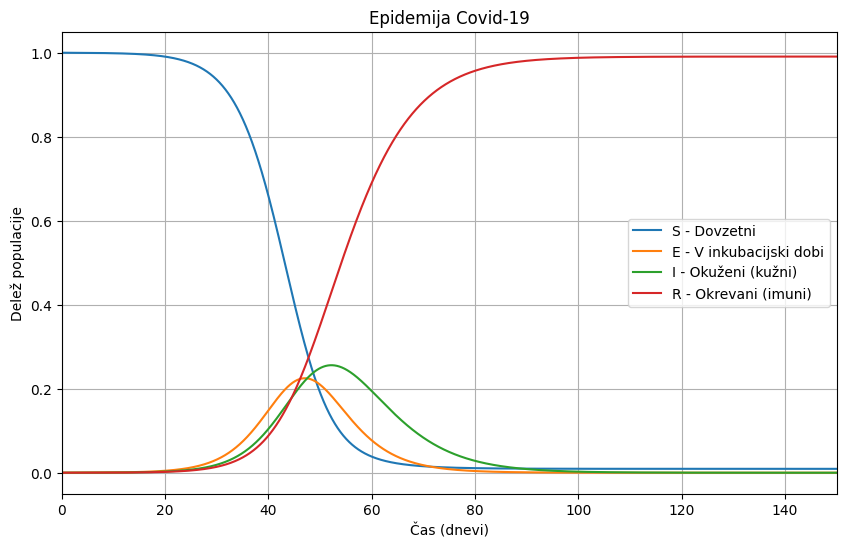

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(t_c, S_c, label='S - Dovzetni')
plt.plot(t_c, E_c, label='E - V inkubacijski dobi')
plt.plot(t_c, I_c, label='I - Okuženi (kužni)')
plt.plot(t_c, R_c, label='R - Okrevani (imuni)')
plt.xlim(0,150)
plt.xlabel('Čas (dnevi)')
plt.ylabel('Delež populacije')
plt.title('Epidemija Covid-19')
plt.legend()
plt.grid(True)
plt.show()

# Model SEIQR (IZOLACIJA)


Prikazal bom primerjavo med potekom epidemije Covid-19 med model SEIR in SEIQR -> torej, da uvedemo karanteno za določen delež obolelih osebkov

$𝑺$: dovzeten delež osebkov
<br />$E$: izpostavljen, a še ne kužen
<br />$𝑰$: delež kužnih osebkov
<br />$𝑸$: izolirani kužni
<br />$𝑹$: delež imunih osebkov
<br />$𝜷$: verjetnost prenosa virusa v stiku z drugo osebo
<br />$𝜿$: število stikov v določeni časovni enoti
<br />$𝑫$: čas kako dolgo je osebek kužen
<br />$𝑳$: povprečno trajanje inkubacijske dobe
<br />$𝜽$: delež kužnih, ki jih dnevno prestavimo v karanteno


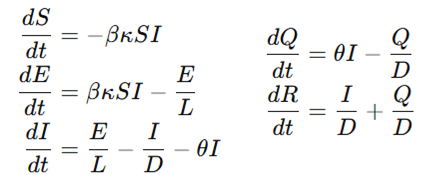

- Za okužbo se morata srečati dovzeten in kužen osebek ($𝑺\cdot𝑰$)
- Po inkubacijski dobi oseba postane kužna ($\frac{𝑬}{𝑳}$)
- Po določenem časi kužna oseba postane imuna ($\frac{𝑰}{𝑫}$)
- Delež kužnih se zmanjša ker jih določen delež gre v karanteno dokler ne ozdravijo ($𝜽\cdot𝑰$)


Diferencialne enačbe

In [13]:
def SEIQR_dS_dt(S, I):
    return -beta * kappa * S * I

def SEIQR_dE_dt(S, I, E):
    return beta * kappa * S * I - (E / L)

def SEIQR_dI_dt(E, I):
    return (E / L) - (I / D) - (theta*I)

def SEIQR_dQ_dt(I,Q):
    return (theta*I) -(Q/D)


def SEIQR_dR_dt(I,Q):
    return (I / D) + (Q/D)

Parametri

In [26]:
# Parametri Covid-19 + izolacija
beta = 0.045
kappa = 15
theta = 0.2 # npr. 20 % okuženih gre v izolacija
D = 7 #dni
L = 5 #dni


# Časovni interval
start_time = 0
stop_time = 250 #dni
dt = 0.01

# Inicializacija stanja 
S_i = [0.9999]
E_i = [0.0]
I_i = [0.0001] #tak delež začetnih okuženih
Q_i = [0.0]
R_i = [0.0]
t_i = [start_time]

Runge-Kutta 4. reda

In [27]:
while t_i[-1] < stop_time:
    s, e, i, q, r = S_i[-1], E_i[-1], I_i[-1], Q_i[-1], R_i[-1]
    
    # k1
    k1_s = dt * SEIQR_dS_dt(s, i)
    k1_e = dt * SEIQR_dE_dt(s, i, e)
    k1_i = dt * SEIQR_dI_dt(e, i)
    k1_q = dt * SEIQR_dQ_dt(i, q)
    k1_r = dt * SEIQR_dR_dt(i, q)
    
    # k2
    k2_s = dt * SEIQR_dS_dt(s + 0.5 * k1_s, i + 0.5 * k1_i)
    k2_e = dt * SEIQR_dE_dt(s + 0.5 * k1_s, i + 0.5 * k1_i, e + 0.5 * k1_e)
    k2_i = dt * SEIQR_dI_dt(e + 0.5 * k1_e, i + 0.5 * k1_i)
    k2_q = dt * SEIQR_dQ_dt(i + 0.5 * k1_i, q + 0.5 * k1_q)
    k2_r = dt * SEIQR_dR_dt(i + 0.5 * k1_i, q + 0.5 * k1_q)

    # k3
    k3_s = dt * SEIQR_dS_dt(s + 0.5 * k2_s, i + 0.5 * k2_i)
    k3_e = dt * SEIQR_dE_dt(s + 0.5 * k2_s, i + 0.5 * k2_i, e + 0.5 * k2_e)
    k3_i = dt * SEIQR_dI_dt(e + 0.5 * k2_e, i + 0.5 * k2_i)
    k3_q = dt * SEIQR_dQ_dt(i + 0.5 * k2_i, q + 0.5 * k2_q)
    k3_r = dt * SEIQR_dR_dt(i + 0.5 * k2_i, q + 0.5 * k2_q)

    # k4
    k4_s = dt * SEIQR_dS_dt(s + k3_s, i + k3_i)
    k4_e = dt * SEIQR_dE_dt(s + k3_s, i + k3_i, e + k3_e)
    k4_i = dt * SEIQR_dI_dt(e + k3_e, i + k3_i)
    k4_q = dt * SEIQR_dQ_dt(i + k3_i, q + k3_q)
    k4_r = dt * SEIQR_dR_dt(i + k3_i, q + k3_q)

    # Naslednji korak
    next_S = s + (1/6)*(k1_s + 2*k2_s + 2*k3_s + k4_s)
    next_E = e + (1/6)*(k1_e + 2*k2_e + 2*k3_e + k4_e)
    next_I = i + (1/6)*(k1_i + 2*k2_i + 2*k3_i + k4_i)
    next_Q = q + (1/6)*(k1_q + 2*k2_q + 2*k3_q + k4_q)
    next_R = r + (1/6)*(k1_r + 2*k2_r + 2*k3_r + k4_r)

    # Shrani
    S_i.append(next_S)
    E_i.append(next_E)
    I_i.append(next_I)
    Q_i.append(next_Q)
    R_i.append(next_R)
    t_i.append(t_i[-1] + dt)
 

### Rezultat - graf 

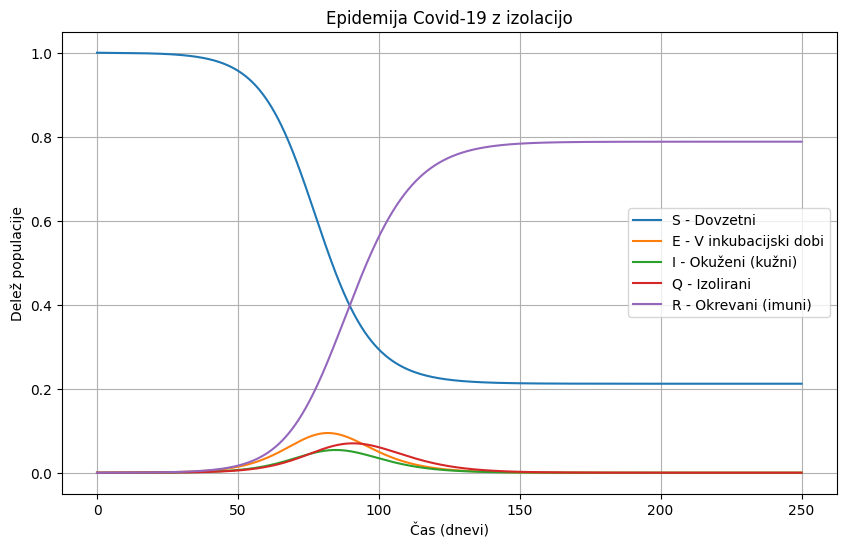

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(t_i, S_i, label='S - Dovzetni')
plt.plot(t_i, E_i, label='E - V inkubacijski dobi')
plt.plot(t_i, I_i, label='I - Okuženi (kužni)')
plt.plot(t_i, Q_i, label='Q - Izolirani')
plt.plot(t_i, R_i, label='R - Okrevani (imuni)')
plt.xlabel('Čas (dnevi)')
plt.ylabel('Delež populacije')
plt.title('Epidemija Covid-19 z izolacijo')
plt.legend()
plt.grid(True)
plt.show()

# Primerjava Covid_19 z izolacijo ali brez

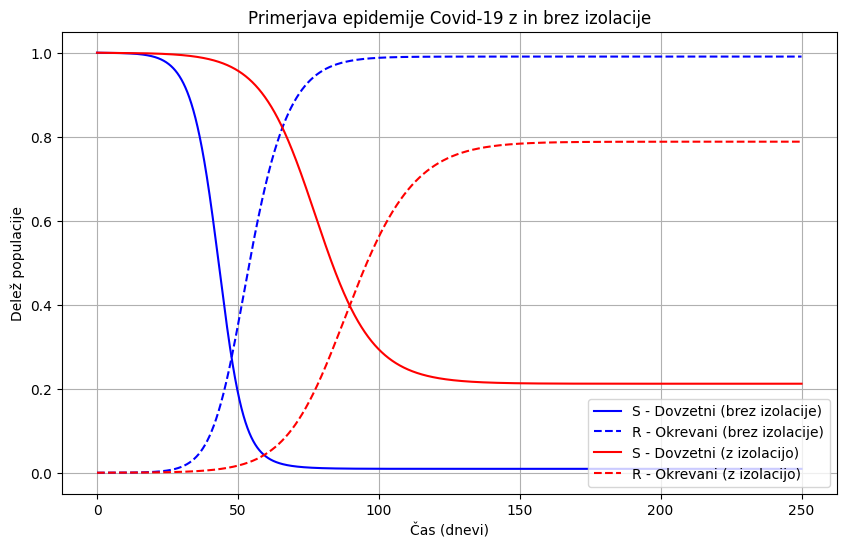

In [30]:
plt.figure(figsize=(10, 6))

# Brez izolacije
plt.plot(t_c, S_c, 'b-', label='S - Dovzetni (brez izolacije)')
plt.plot(t_c, R_c, 'b--', label='R - Okrevani (brez izolacije)')

# Z izolacijo
plt.plot(t_i, S_i, 'r-', label='S - Dovzetni (z izolacijo)')
plt.plot(t_i, R_i, 'r--', label='R - Okrevani (z izolacijo)')

plt.xlabel('Čas (dnevi)')
plt.ylabel('Delež populacije')
plt.title('Primerjava epidemije Covid-19 z in brez izolacije')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- Bolezen prizadene manj osebkov naenkrat, zboli pa v daljšem časovnem obdobju enako ljudi, ali pa nekateri večkrat, če je imunost že minila –> <br />izkaže se kot dober ukrep, če je premalo prostora v bolnicah
- če je dovolj velika izolacija lahko dosežemo tudi čredno imunost in nakoncu nekateri ne zbolijo (večja $\theta$)
